# Machine Learning Classification
# Predicting Pulsars using HTRU 2 Dataset 
The aim of this project is to classify if a pulsar candidate is a pulsar or not. For this purpose we will be using the HTRU 2 dataset which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey. We will using various machine leaning models to perform the classification and compare them.

Group Members:
- Shivesh Kaundinya
- Shikhar Nigam
- Saurabh Shukla
- Roshan Kumar


## Setup

We will begin by importing all the required modules

In [55]:
"""
Importing Modules
"""
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [56]:
"""
Importing Machine Learning Modules
"""
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve, auc, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import classification_report


Reading the dataset and assigning names to the colums

In [57]:
"""
Importing the Dataset
"""
data = pd.read_csv("HTRU_2.csv", names=[' Mean of the integrated profile',
                                        ' Standard deviation of the integrated profile',
                                        ' Excess kurtosis of the integrated profile',
                                        ' Skewness of the integrated profile', 
                                        ' Mean of the DM-SNR curve',
                                        ' Standard deviation of the DM-SNR curve',
                                        ' Excess kurtosis of the DM-SNR curve', 
                                        ' Skewness of the DM-SNR curve',
                                        'target_class'])



## Analysis of the HTRU2 Dataset

In [58]:
print("Dataset has {} records and {} features.".format(*data.shape))
print("Pulsars: {}".format(len(data[data['target_class'] == 1])))
print("Not Pulsars: {}".format(len(data[data['target_class'] == 0])))
data.head() # First 5 features of the dataset


Dataset has 17898 records and 9 features.
Pulsars: 1639
Not Pulsars: 16259


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


Using pairplot to compare all the features of the data among themselves

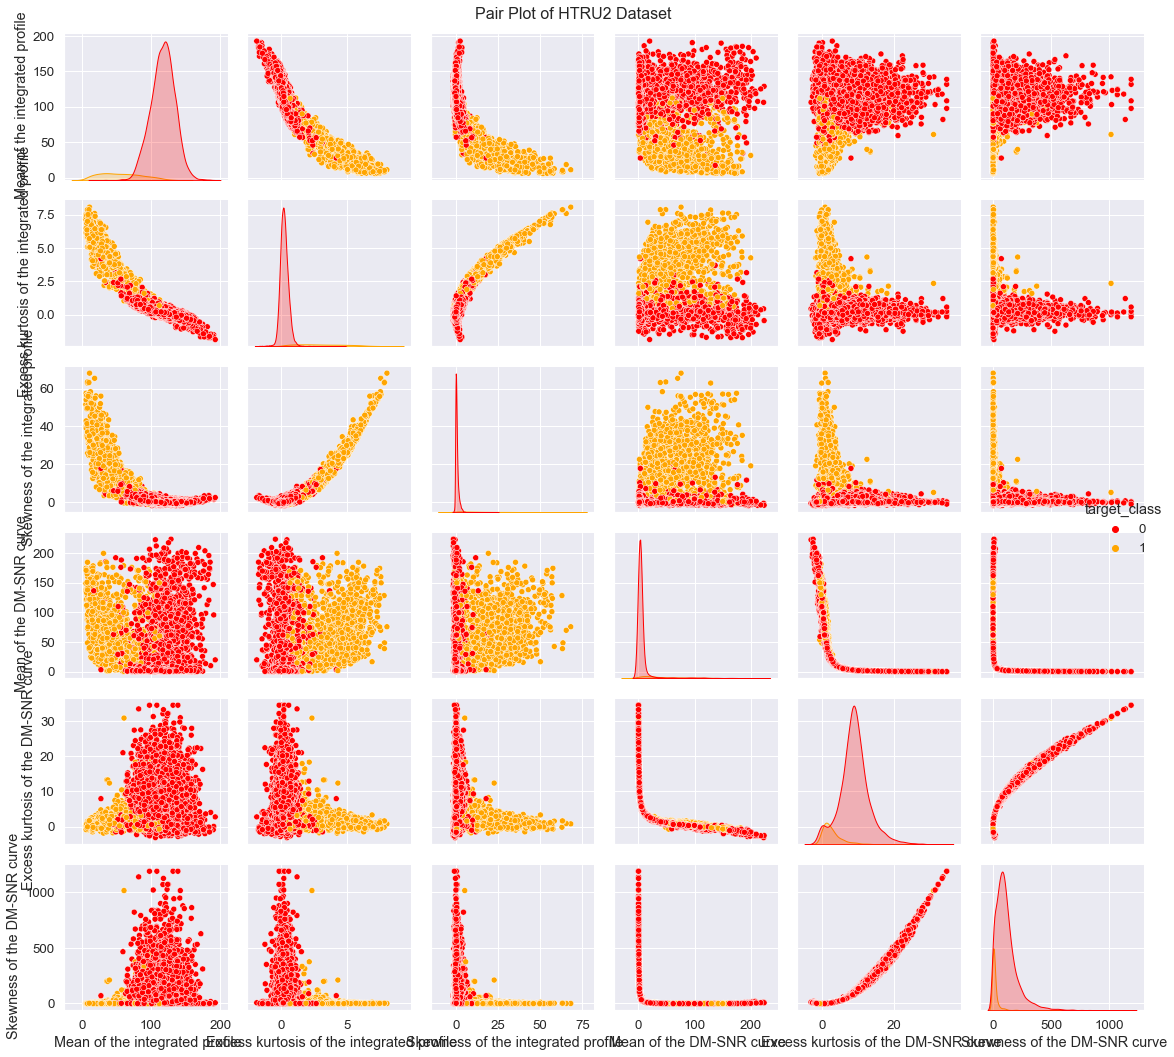

In [59]:
sns.pairplot(data=data,
             palette=['red','orange'],
             hue="target_class",
             vars=[' Mean of the integrated profile',
                   ' Excess kurtosis of the integrated profile',
                   ' Skewness of the integrated profile', 
                   ' Mean of the DM-SNR curve',
                   ' Excess kurtosis of the DM-SNR curve', 
                   ' Skewness of the DM-SNR curve'])

plt.suptitle("Pair Plot of HTRU2 Dataset ", fontsize=16)

plt.tight_layout()
plt.show() 


It can be seen that most of the features of the data are quite separable and can therefore be easily classified 

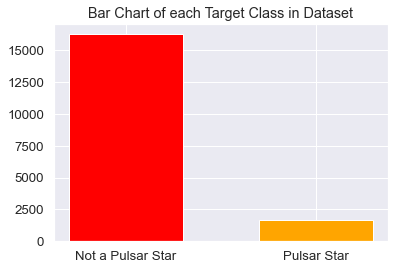

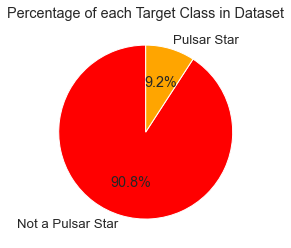

In [60]:
"""
Number of each target class in dataset using various charts
"""
Not_Pulsar_num = len(data[data['target_class'] == 0]) # Data where class isn't a Pulsar
Pulsar_num  = len(data[data['target_class'] == 1]) # Data where class is a Pulsar
num_list = [Not_Pulsar_num, Pulsar_num]
class_names = ['Not a Pulsar Star','Pulsar Star'] # names of classes used later

fig1, ax1 = plt.subplots()
ax1.bar(class_names, num_list, width=0.6, align='center', color=['red', 'orange'])
ax1.set_title("Bar Chart of each Target Class in Dataset");

fig2, ax2 = plt.subplots()
ax2.pie(num_list, labels=class_names, autopct='%1.1f%%', shadow=False, startangle=90, colors = ['red', 'orange'])
ax2.set_title("Percentage of each Target Class in Dataset");

It can be seen that the disttribution between both the classes is quite imbalanced. The number of pulsar classes is very low as compared to non-pulsar classes

## Studying the Distribution of Each Feature in Dataset

C:\Users\Shivesh Kaundinya\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


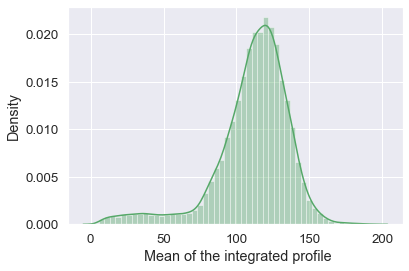

C:\Users\Shivesh Kaundinya\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


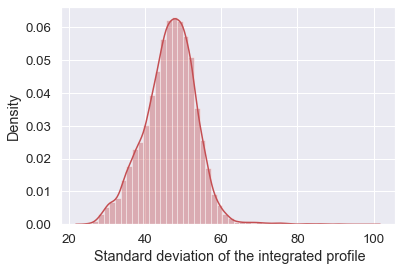

C:\Users\Shivesh Kaundinya\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


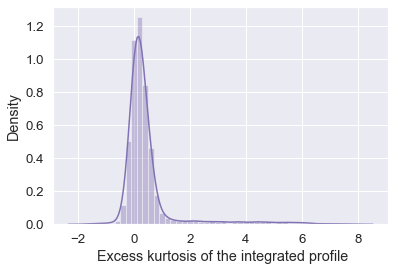

C:\Users\Shivesh Kaundinya\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


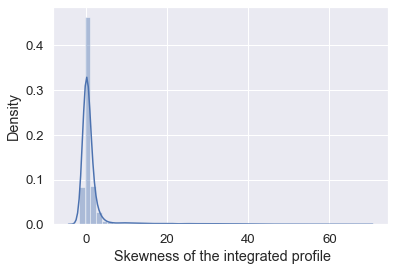

C:\Users\Shivesh Kaundinya\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


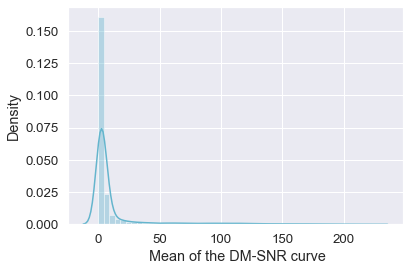

C:\Users\Shivesh Kaundinya\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


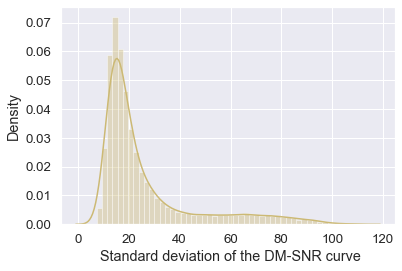

C:\Users\Shivesh Kaundinya\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


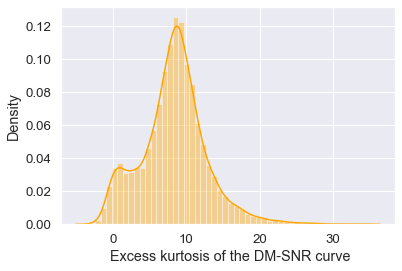

C:\Users\Shivesh Kaundinya\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


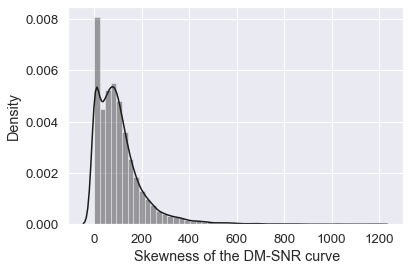

In [61]:
columns = [' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve']

color_range  = ["g","r","m","b","c","y","orange","k"] # colours used for each density plot

"""
Looping through column list and colour range list
"""
for i in range(len(columns)): 
    sns.distplot(data[columns[i]], color = color_range[i], hist = True) # Distribution Plot for each Feature in Dataset
    plt.ylabel("Density")
    plt.show()

In [62]:
# All features where target class isn't a Pulsar 
not_pulsar_data = data[data['target_class'] == 0]

# All features where target class is a Pulsar
pulsar_data = data[data['target_class'] == 1]


Excess_not_pulsar = not_pulsar_data[' Excess kurtosis of the integrated profile']
Mean_not_pulsar = not_pulsar_data[' Mean of the integrated profile']
Stdev_not_pulsar = not_pulsar_data[' Standard deviation of the integrated profile']
skew_not_pulsar = not_pulsar_data[' Skewness of the integrated profile']


Excess_pulsar = pulsar_data[' Excess kurtosis of the integrated profile']
Mean_pulsar = pulsar_data[' Mean of the integrated profile']
Stdev_pulsar = pulsar_data[' Standard deviation of the integrated profile']
skew_pulsar = pulsar_data[' Skewness of the integrated profile']

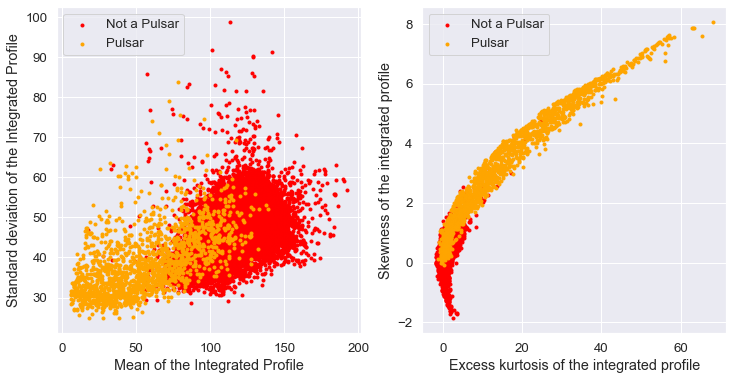

In [63]:
"""
Plot of Standard deviation of the Integrated Profile vs Mean of the Integrated Profile
"""
plt.figure(figsize=(12, 6))

ax3 = plt.subplot(121)
ax3.scatter(Mean_not_pulsar, Stdev_not_pulsar, marker = '.', label = "Not a Pulsar", color = 'red')
ax3.scatter(Mean_pulsar, Stdev_pulsar,marker = '.', label = "Pulsar", color = 'orange')
ax3.legend(loc = 'best')
ax3.set_ylabel("Standard deviation of the Integrated Profile")
ax3.set_xlabel("Mean of the Integrated Profile")

"""
Plot of Skewness of the Integrated Profile vs Excess kurtosis of the Integrated Profile
"""
ax4 = plt.subplot(122)
ax4.scatter(skew_not_pulsar, Excess_not_pulsar, marker = '.', label = "Not a Pulsar", color = 'red')
ax4.scatter(skew_pulsar, Excess_pulsar,marker = '.', label = "Pulsar", color = 'orange')
ax4.legend(loc = 'best')
ax4.set_xlabel("Excess kurtosis of the integrated profile")
ax4.set_ylabel("Skewness of the integrated profile");

In [64]:
DM_SNR_Excess_not_pulsar = not_pulsar_data[' Excess kurtosis of the DM-SNR curve']
DM_SNR_Mean_not_pulsar = not_pulsar_data[' Mean of the DM-SNR curve']
DM_SNR_Stdev_not_pulsar = not_pulsar_data[' Standard deviation of the DM-SNR curve']
DM_SNR_skew_not_pulsar = not_pulsar_data[' Skewness of the DM-SNR curve']


DM_SNR_Excess_pulsar = pulsar_data[' Excess kurtosis of the DM-SNR curve']
DM_SNR_Mean_pulsar = pulsar_data[' Mean of the DM-SNR curve']
DM_SNR_Stdev_pulsar = pulsar_data[' Standard deviation of the DM-SNR curve']
DM_SNR_skew_pulsar = pulsar_data[' Skewness of the DM-SNR curve']


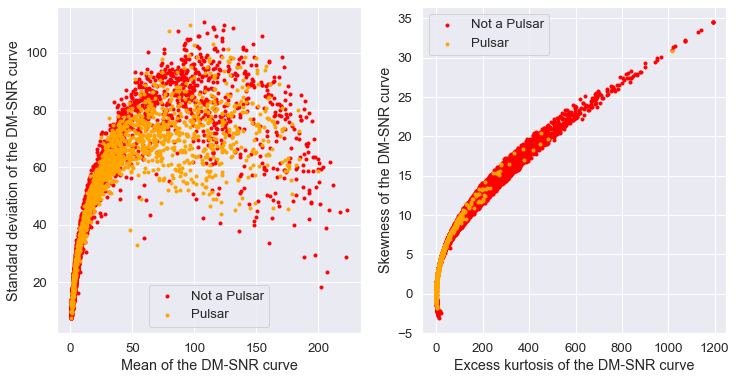

In [65]:
"""
Plot of Standard deviation of the DM-SNR curve vs Mean of the DM-SNR curve
"""

plt.figure(figsize=(12, 6))

ax5 = plt.subplot(121)
ax5.scatter(DM_SNR_Mean_not_pulsar, DM_SNR_Stdev_not_pulsar, marker = '.', label = "Not a Pulsar", color = 'red')
ax5.scatter(DM_SNR_Mean_pulsar, DM_SNR_Stdev_pulsar,marker = '.', label = "Pulsar", color = 'orange')
ax5.legend(loc = 'best')
ax5.set_ylabel("Standard deviation of the DM-SNR curve")
ax5.set_xlabel("Mean of the DM-SNR curve")

"""
Plot of Standard deviation of the Skewness vs Mean of the Excess kurtosis
"""
ax6 = plt.subplot(122)
ax6.scatter(DM_SNR_skew_not_pulsar, DM_SNR_Excess_not_pulsar, marker = '.', label = "Not a Pulsar", color = 'red')
ax6.scatter(DM_SNR_skew_pulsar, DM_SNR_Excess_pulsar,marker = '.', label = "Pulsar", color = 'orange')
ax6.legend(loc = 'best')
ax6.set_xlabel("Excess kurtosis of the DM-SNR curve")
ax6.set_ylabel("Skewness of the DM-SNR curve");

## Classification
We will be using 4 classifiers (Support Vector Classifier, k Nearest Neighbour, Linear Discriminant Classifier and Gaussian Naive Bayes) and comparing their performances.

In [66]:
"""
CLASSIFICATION APPROACHES 
"""

# Column representing the different pulsar classes
classes = data["target_class"]

# Dropping the class column
data = data.drop('target_class', axis=1)

# Splitting the Data for Testing and Training
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, classes, test_size=0.25, stratify=classes, random_state=4)

                   precision    recall  f1-score   support

Not a Pulsar Star       0.98      0.99      0.99      4065
      Pulsar Star       0.93      0.80      0.86       410

         accuracy                           0.98      4475
        macro avg       0.95      0.89      0.92      4475
     weighted avg       0.97      0.98      0.97      4475



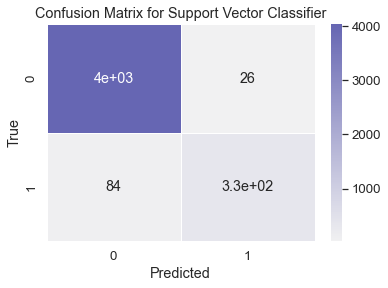

In [67]:
"""
Support Vector Classifier
"""
from sklearn import svm

svc = svm.SVC(probability=True)
svc.fit(X_train, y_train) 
y_pred_svc = svc.predict(X_test)

print(classification_report(y_test,y_pred_svc, target_names = class_names))

cm_svc = confusion_matrix(y_test, y_pred_svc) # Confusion Matrix

"""
Plotting Heat Map for Confusion Matrix
"""
sns.set(font_scale=1.2)
sns.heatmap(cm_svc, linewidths=0.5, cmap=sns.light_palette((0.4, 0.4, 0.7), n_colors=10000), annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix for Support Vector Classifier");

                   precision    recall  f1-score   support

Not a Pulsar Star       0.98      0.99      0.99      4065
      Pulsar Star       0.87      0.83      0.85       410

         accuracy                           0.97      4475
        macro avg       0.93      0.91      0.92      4475
     weighted avg       0.97      0.97      0.97      4475



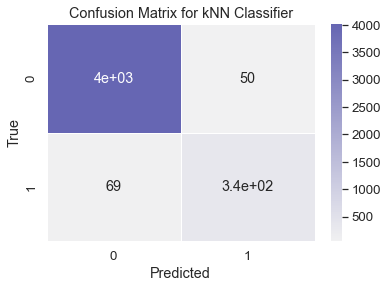

In [68]:
"""
k-Nearest Neighbor
"""
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors = 3)
knn = knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

print(classification_report(y_test,y_pred_knn, target_names = class_names))

cm_knn = confusion_matrix(y_test, y_pred_knn) # Confusion Matrix

"""
Plotting Heat Map for Confusion Matrix
"""
sns.set(font_scale=1.2)
sns.heatmap(cm_knn, linewidths=0.5, cmap=sns.light_palette((0.4, 0.4, 0.7), n_colors=10000), annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix for kNN Classifier");

                   precision    recall  f1-score   support

Not a Pulsar Star       0.98      0.99      0.99      4065
      Pulsar Star       0.92      0.81      0.86       410

         accuracy                           0.98      4475
        macro avg       0.95      0.90      0.92      4475
     weighted avg       0.98      0.98      0.98      4475



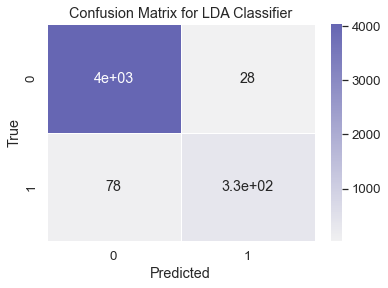

In [69]:
"""
Linear Discriminant Analysis
"""
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 

lda=LDA(n_components=None)
fit = lda.fit(X_train,y_train) # fitting LDA to dataset
y_pred_lda=lda.predict(X_test) # predicting with LDA 

print(classification_report(y_test,y_pred_lda, target_names = class_names))

cm_lda = confusion_matrix(y_test, y_pred_lda) 

"""
Plotting Heat Map for Confusion Matrix
"""
sns.set(font_scale=1.2)
sns.heatmap(cm_lda, linewidths=0.5, cmap=sns.light_palette((0.4, 0.4, 0.7), n_colors=10000), annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix for LDA Classifier");


                   precision    recall  f1-score   support

Not a Pulsar Star       0.99      0.96      0.97      4065
      Pulsar Star       0.68      0.87      0.76       410

         accuracy                           0.95      4475
        macro avg       0.83      0.91      0.87      4475
     weighted avg       0.96      0.95      0.95      4475



Text(0.5, 1.0, 'Confusion Matrix for GNB Classifier')

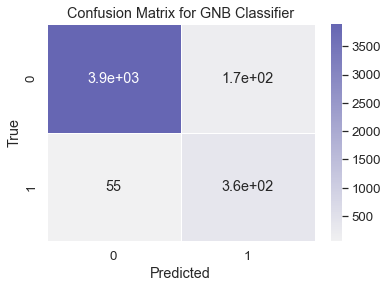

In [70]:
"""
Gaussian Naive Bayes
"""
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)

print(classification_report(y_test,y_pred_gnb, target_names = class_names))

cm_gnb = confusion_matrix(y_test, y_pred_gnb) 

"""
Plotting Heat Map for Confusion Matrix
"""
sns.set(font_scale=1.2)
sns.heatmap(cm_gnb, linewidths=0.5, cmap=sns.light_palette((0.4, 0.4, 0.7), n_colors=10000), annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix for GNB Classifier")


## Reciever Operating Curves (ROC) and Area Under Curve Scores (AUC) 

In [71]:
"""
Function for solving ROC Curve for any algorithm
"""
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def ROC(algorithm, x_test, y_test, graph_label):
    
    # predict probabilities
    alg_probs = algorithm.predict_proba(x_test)
    # keep probabilities for the positive outcome only
    alg_probs = alg_probs[:,1]
    # calculate scores
    alg_score = roc_auc_score(y_test, alg_probs)
    # calculate roc curves
    alg_fpr, alg_tpr, _ = roc_curve(y_test, alg_probs)
    
    plt.plot(alg_fpr, alg_tpr, label = graph_label+": "+str(round(alg_score,2)))
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = 'best')
    


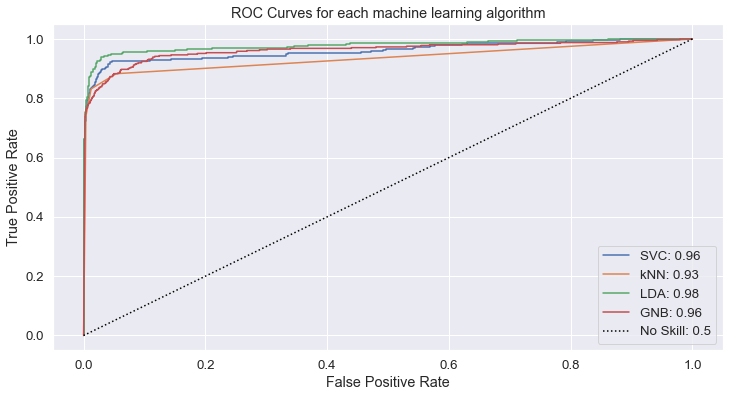

In [72]:
"""
Plotting the ROC Curve for each Classifier used
"""
plt.figure(figsize=(12, 6)) # setting the size of the figure

ROC(svc, X_test, y_test, "SVC")
ROC(knn, X_test, y_test, "kNN")
ROC(lda, X_test, y_test, "LDA")
ROC(gnb, X_test, y_test, "GNB")

plt.plot([1,0], [1,0], color = 'black', linestyle = 'dotted', label = 'No Skill: 0.5')
plt.legend(loc = 'best')

plt.title("ROC Curves for each machine learning algorithm");


Linear Discriminant Classifier achieved the best AUC score while k Nearest Neighbour achieved the worst AUC score

## Precision Recall Curves

In [73]:
"""
Function for plotting the Precision Recall Curve for each Classifier used
"""
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

def Pre_Recall(algorithm, x_test, y_test, graph_label):
    # predict probabilities
    alg_probs = algorithm.predict_proba(x_test)

    # keep probabilities for the positive outcome only
    alg_probs = alg_probs[:,1]

    # calculate scores
    roc_auc_score(y_test, alg_probs)

    # calculate roc curves
    alg_precision, alg_recall, _ = precision_recall_curve(y_test, alg_probs)
    auc_score = auc(alg_recall, alg_precision)
    plt.plot(alg_recall, alg_precision, label = graph_label + str(round(auc_score,2)))
    
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc = 'best')

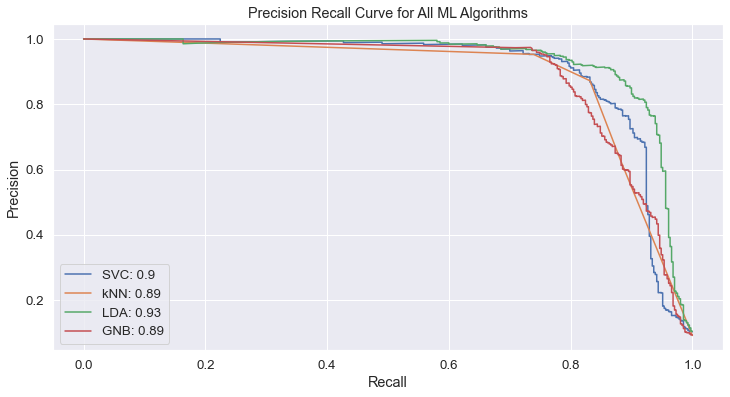

In [74]:
"""
Plotting the Precision Recall Curve for each Classifier used
"""
plt.figure(figsize=(12, 6)) # setting the size of the figure

Pre_Recall(svc, X_test, y_test, "SVC: ")
Pre_Recall(knn, X_test, y_test, "kNN: ")
Pre_Recall(lda, X_test, y_test, "LDA: ")
Pre_Recall(gnb, X_test, y_test, "GNB: ")

plt.title("Precision Recall Curve for All ML Algorithms");


## Conclusion
Overall all classifiers used performed well on this dataset for the most part, the classifiers used were limited to the class imbalance present in this dataset. The stronger performing classifiers were the Linear Discriminant Analysis and Support Vector Classifier while weaker performing classifiers were the k-Nearest Neighbor and Gaussian Naive Bayes classifers. 
